4. To implement the improved Euler method for this system, we will need to create two stages for x and y: 

$K_{1y}=f_y(t_n,y^n,x^n)$

$K_{1x}=f_x(t_n,y^n,x^n)$

$K_{2y}=f_y(t_n+\Delta t,y^n+\Delta tK_{1y},x^n+\Delta tK_{1x})$

$K_{2x}=f_x(t_n+\Delta t,y^n+\Delta tK_{1y},x^n+\Delta tK_{1x})$

$y^{n+1}=y^n+\Delta t [\frac{1}{2}K_{1y}+\frac{1}{2}K_{2y}]$

$x^{n+1}=x^n+\Delta t [\frac{1}{2}K_{1x}+\frac{1}{2}K_{2x}]$

We are given that:

$y'=y(x-1)=f_y(t_n,y^n,x^n)$

$x'=x(1-y)=f_x(t_n,y^n,x^n)$

$0\leq t \leq 8$

$\Delta t=0.01$

I will first start by creating the function to do the calculation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
def fy(x,y):
    return y*(x-1)

def fx(x,y):
    return x*(1-y)

def improved_euler(x0, y0, T, dt):
    t_values = np.arange(0, T + dt, dt)
    x_values = np.zeros(len(t_values))
    y_values = np.zeros(len(t_values))

    x_values[0] = x0
    y_values[0] = y0

    for i in range(1, len(t_values)):
        x_n = x_values[i-1]
        y_n = y_values[i-1]

        K1x = fx(x_n, y_n)
        K1y = fy(x_n, y_n)

        K2x = fx(x_n + dt * K1x, y_n + dt * K1y)
        K2y = fy(x_n + dt * K1x, y_n + dt * K1y)

        x_values[i] = x_n + dt / 2 * (K1x + K2x)
        y_values[i] = y_n + dt / 2 * (K1y + K2y)

    return x_values, y_values


A). Now I will use the initial condition $x(0)=0.25$ and $y(0)=0.75$

<function matplotlib.pyplot.show(close=None, block=None)>

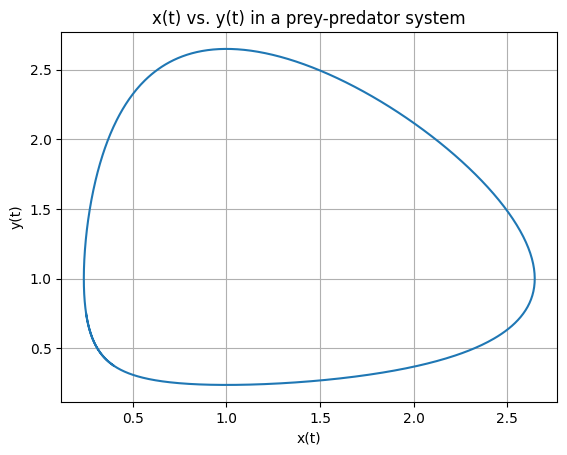

In [45]:
x_vals, y_vals = improved_euler(0.25, 0.75, 8, 0.01)

plt.plot(x_vals, y_vals)
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.title("x(t) vs. y(t) in a prey-predator system")
plt.grid()
plt.show

B). $x(0)=0.5$ and $y(0)=0.5$

<function matplotlib.pyplot.show(close=None, block=None)>

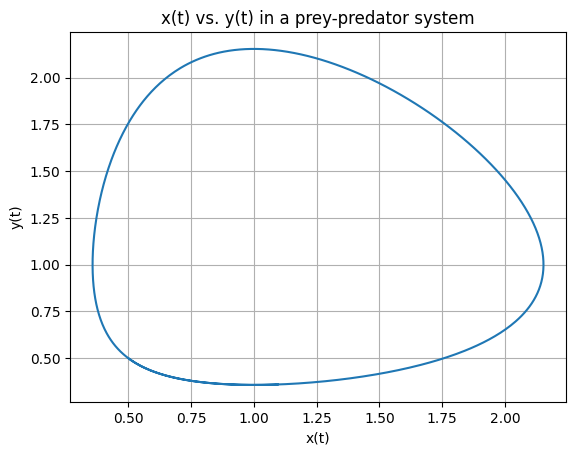

In [54]:
x_vals, y_vals = improved_euler(0.5, 0.5, 8, 0.01)

plt.plot(x_vals, y_vals)
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.title("x(t) vs. y(t) in a prey-predator system")
plt.grid()
plt.show

C). $x(0)=0.9$ and $y(0)=0.9$

<function matplotlib.pyplot.show(close=None, block=None)>

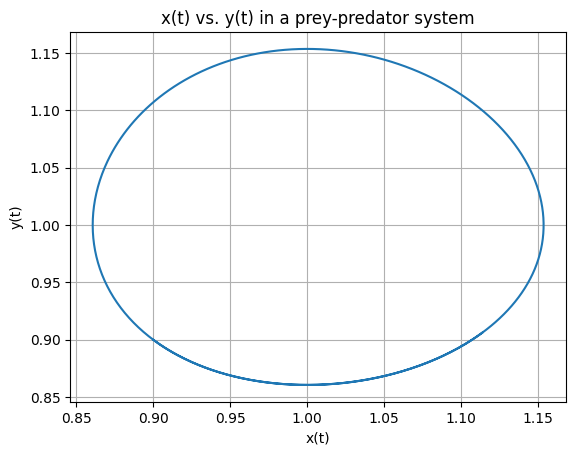

In [53]:
x_vals, y_vals = improved_euler(0.9, 0.9, 8, 0.01)

plt.plot(x_vals, y_vals)
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.title("x(t) vs. y(t) in a prey-predator system")
plt.grid()
plt.show

All together:

<function matplotlib.pyplot.show(close=None, block=None)>

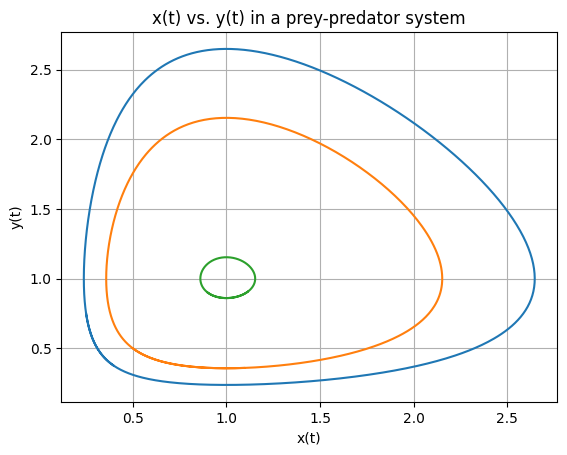

In [58]:
conditions = [[0.25, 0.75], [0.5,0.5], [0.9,0.9]]

for i in conditions:
    x_vals, y_vals = improved_euler(i[0], i[1], 8, 0.01)
    plt.plot(x_vals, y_vals)

plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.title("x(t) vs. y(t) in a prey-predator system")
plt.grid()
plt.show

We can clearly see that this is a cyclical system, with the first initial condition having the largest range of values possible, and the last having the smallest range.